# Analysis of Penguin Dataset

The first phase of EDA is understanding the "shape" and "health" of our raw data. We use Pandas to load the `penguins.csv` file and perform a high-level audit.

**Shape:** Identifies the number of rows and columns.
**Data Types:** Ensures numerical values aren't being treated as strings.
**Summary Stats:** Provides the mean, standard deviation, and quartiles for features like body mass and bill length.

In [61]:
import pandas as pd
df = pd.read_csv('data/penguins.csv')

# Verify it worked
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


## 2. Data Cleaning
We need to handle missing values to ensure our analysis is accurate.
- **Measurements:** We will drop rows where critical physical measurements (`bill_length_mm`, `flipper_length_mm`) are missing, as we cannot infer these biological traits safely.
- **Sex:** For the `sex` column, we will fill missing values with `'Unknown'` to preserve the sample size for species-level analysis.

In [62]:
# Create a copy to keep the original data safe
df_clean = df.copy()

# 1. Drop rows with missing measurement data
# We check a subset of columns critical for our graphs
df_clean = df_clean.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'body_mass_g'])

# 2. Fill missing 'sex' data with 'Unknown'
df_clean['sex'] = df_clean['sex'].fillna('Unknown')

# 3. Verify cleaning
print("Missing values after cleaning:")
print(df_clean.isnull().sum())

print(f"\nRows remaining: {len(df_clean)} (Original: {len(df)})")

Missing values after cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Rows remaining: 342 (Original: 344)


## 3. Comparative Visualizations
We will visualize the species differences using a $2 \times 2$ grid:
1.  **Bill Length (Histogram):** To see the distribution and overlaps between species.
2.  **Flipper Length (Boxplot):** To compare the median and spread of sizes.
3.  **Body Mass vs Bill Length (Scatter):** To identify correlations between weight and beak size.
4.  **Species by Island (Countplot):** To observe geographic segregation.

/var/folders/88/frzg2_v50x911ntwp_sthk_00000gn/T/ipykernel_34693/643836536.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='species', y='flipper_length_mm', ax=ax[0,1], palette='Set2')


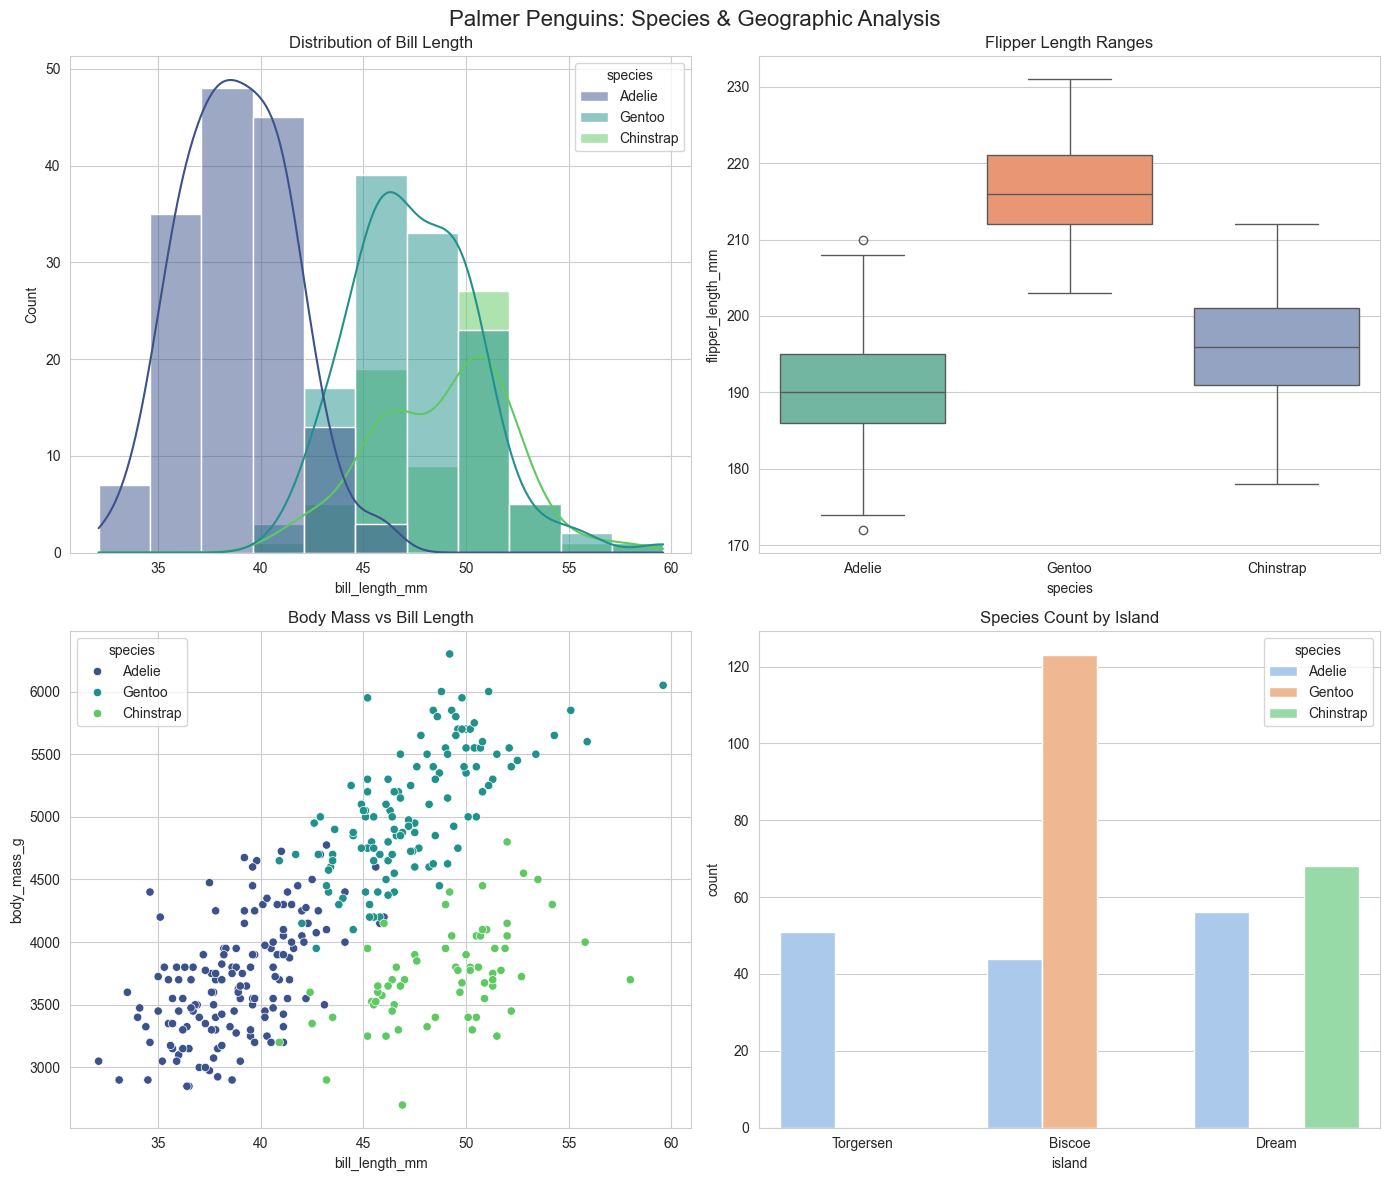

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style
sns.set_style("whitegrid")

# Create the 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Palmer Penguins: Species & Geographic Analysis', fontsize=16)

# A) Histogram: Bill Length by Species
sns.histplot(data=df_clean, x='bill_length_mm', hue='species', kde=True, ax=ax[0,0], palette='viridis')
ax[0,0].set_title('Distribution of Bill Length')

# B) Boxplot: Flipper Length by Species
sns.boxplot(data=df_clean, x='species', y='flipper_length_mm', ax=ax[0,1], palette='Set2')
ax[0,1].set_title('Flipper Length Ranges')

# C) Scatterplot: Bill Length vs Body Mass
sns.scatterplot(data=df_clean, x='bill_length_mm', y='body_mass_g', hue='species', ax=ax[1,0], palette='viridis')
ax[1,0].set_title('Body Mass vs Bill Length')

# D) Countplot: Species by Island
sns.countplot(data=df_clean, x='island', hue='species', ax=ax[1,1], palette='pastel')
ax[1,1].set_title('Species Count by Island')

plt.tight_layout()
plt.show()

## 4. Key Insights
Based on the visualizations above, we can draw the following conclusions for stakeholders:

| Observation | Supporting Data | Implication |
| :--- | :--- | :--- |
| **The "Gentoo Giant"** | In the **Flipper Length Boxplot**, Gentoo penguins consistently show the highest median flipper length (>210mm) and are distinctly heavier in the **Scatterplot**. | Gentoo penguins are physically the largest of the three, suggesting they may hunt larger prey or dive deeper. |
| **Geographic Segregation** | The **Island Countplot** reveals that Gentoos are found *only* on Biscoe island, while Adelies are found on all three. | Biscoe Island is a critical habitat. Conservation efforts for Gentoos can be geographically focused there. |
| **Bill Length vs. Species** | The **Histogram** shows a bimodal distribution. Chinstraps and Gentoos have similar (longer) bill lengths, while Adelies have significantly shorter bills. | Bill length alone distinguishes Adelie from the others, but isn't enough to tell Chinstrap and Gentoo apart (you would need body mass for that). |

## 5. Feature Correlations
Finally, we examine how different physical measurements correlate with one another across the entire dataset.

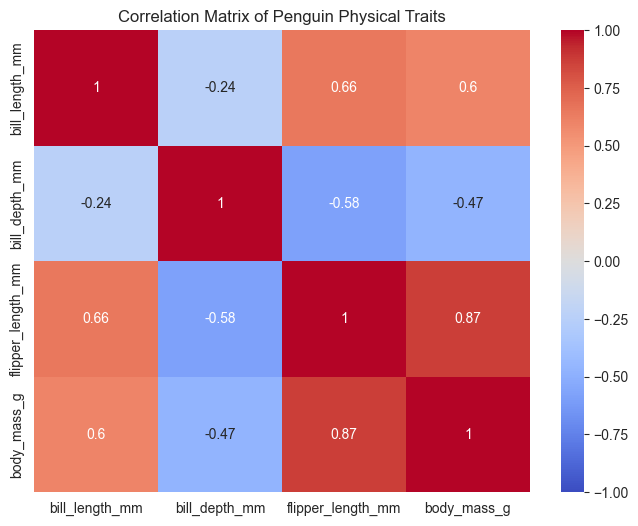

In [60]:
# Select only numeric columns for correlation
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Penguin Physical Traits')
plt.show()